## SVR CNN

## CNN parameters :
Best trial: {'filters': 65, 'kernel_size': 1, 'lr': 0.0036905697528497043, 'epochs': 44, 'batch_size': 32}


## SVR parameters
 9 with optuna {'C': 9.273202181050134, 'epsilon': 0.30349767581664033, 'kernel': 'linear'}.

Downloading...
From: https://docs.google.com/spreadsheets/d/11kMXVOIzTz0EGXQDYJtX945igTfAjqwg/export?format=xlsx
To: /content/Inflation_Predictions_SARIMA.xlsx
16.9kB [00:00, 2.95MB/s]


   Year  Month  Day  Inflation
0  2000      1   31   0.329139
1  2000      2   28   1.940367
2  2000      3   31   4.469678
3  2000      4   30   3.672022
4  2000      5   31   2.382412
Index(['Year', 'Month', 'Day', 'Inflation'], dtype='object')
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
200

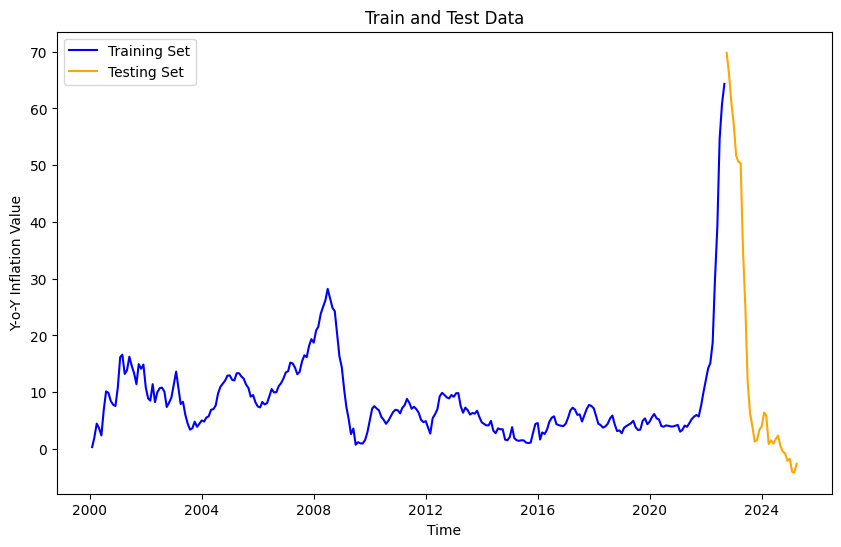

In [1]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")
# Standard libraries
import sys
import os
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# LOADING THE DATASET
import gdown
# Google Sheets URL (Updated)
google_sheets_url = "https://docs.google.com/spreadsheets/d/11kMXVOIzTz0EGXQDYJtX945igTfAjqwg/export?format=xlsx"

# Download file
output_file = 'Inflation_Predictions_SARIMA.xlsx'
gdown.download(google_sheets_url, output=output_file, quiet=False)

# Load data
data = pd.read_excel(output_file)

# Initial display
print(data.head())

# Copy and explore
df = data.copy()
print(df.columns)

# Display column names
df.columns


# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()

df.columns
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'df' contains the Inflation data in a column named 'Inflation'

# Step 1: Create lag features
max_lag = 9  # Maximum number of lags
for lag in range(1, max_lag + 1):
    df[f'Inflation_Lag_{lag}'] = df['Inflation'].shift(lag)

# Drop NaN values caused by shifting (we can't use rows with missing lag values)
df = df.dropna()

# Step 2: Split the data into train and test sets
train_size = int(0.9 * len(df))
train = df[:train_size]
test = df[train_size:]

# Define dependent variable y (current Inflation)
y_train = train['Inflation']
y_test = test['Inflation']

# Define exogenous variables X (past 9 lags of Inflation)
X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]


In [2]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 12.0 MB/s eta 0:00:00


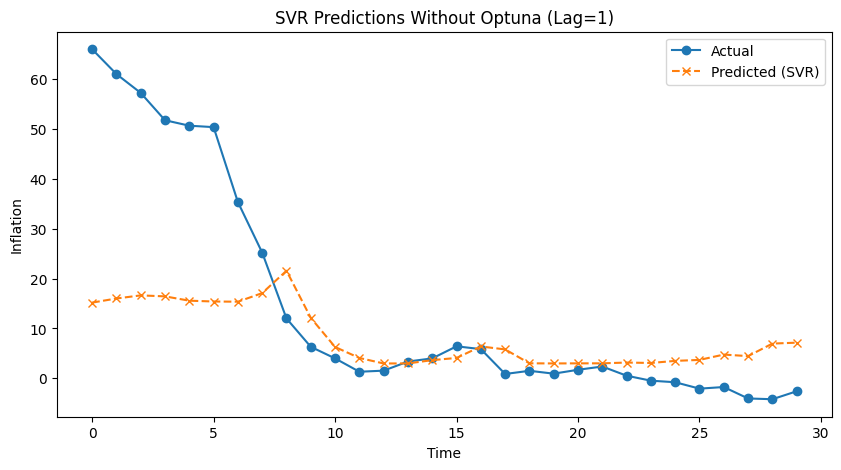

[I 2025-05-15 04:49:52,811] A new study created in memory with name: no-name-50a30ebe-5ed9-4382-b577-1a56465a39f6
[I 2025-05-15 04:49:52,869] Trial 0 finished with value: 78.33135431240694 and parameters: {'C': 8.706074258368417, 'epsilon': 0.4834171128840036, 'kernel': 'sigmoid'}. Best is trial 0 with value: 78.33135431240694.
[I 2025-05-15 04:49:52,920] Trial 1 finished with value: 21.74076059311853 and parameters: {'C': 1.7960339588236296, 'epsilon': 0.6078878965215551, 'kernel': 'sigmoid'}. Best is trial 1 with value: 21.74076059311853.
[I 2025-05-15 04:49:53,017] Trial 2 finished with value: 1.808285958507745 and parameters: {'C': 2.7253211320054107, 'epsilon': 0.9154567486186524, 'kernel': 'linear'}. Best is trial 2 with value: 1.808285958507745.
[I 2025-05-15 04:49:53,959] Trial 3 finished with value: 20.66342076871783 and parameters: {'C': 9.392039668480919, 'epsilon': 0.36161043191750103, 'kernel': 'poly'}. Best is trial 2 with value: 1.808285958507745.
[I 2025-05-15 04:49:54,

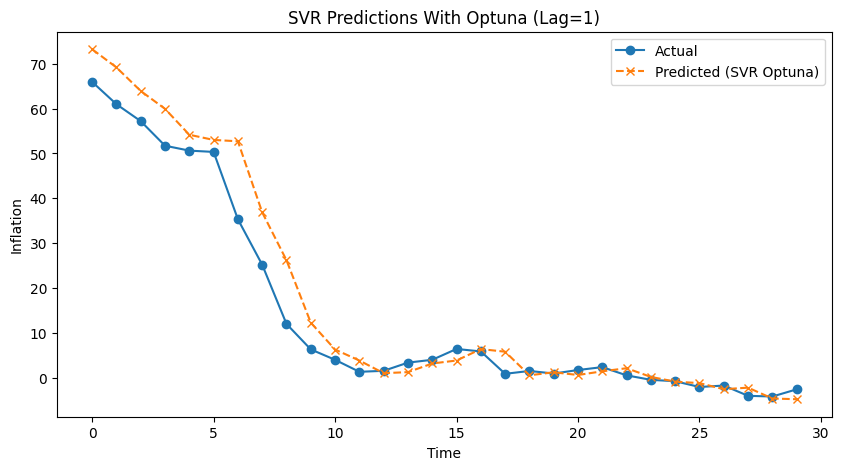

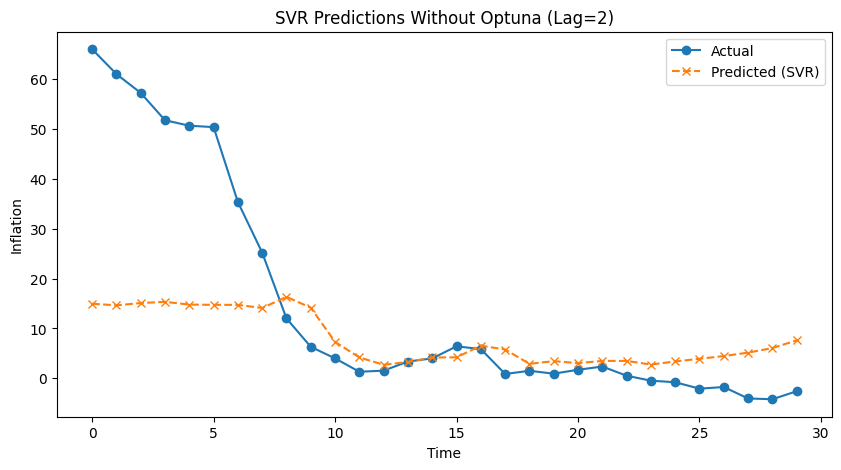

[I 2025-05-15 04:49:56,633] A new study created in memory with name: no-name-2994db48-ff87-49af-9d5f-8e24c57227a9
[I 2025-05-15 04:49:56,796] Trial 0 finished with value: 1.655815906313506 and parameters: {'C': 6.24865955025447, 'epsilon': 0.3258040953953802, 'kernel': 'linear'}. Best is trial 0 with value: 1.655815906313506.
[I 2025-05-15 04:49:57,059] Trial 1 finished with value: 22.193380393779215 and parameters: {'C': 3.7943166816479206, 'epsilon': 0.07095099228111196, 'kernel': 'poly'}. Best is trial 0 with value: 1.655815906313506.
[I 2025-05-15 04:49:57,116] Trial 2 finished with value: 1.7127201885941552 and parameters: {'C': 0.3165609038894942, 'epsilon': 0.03765453030706551, 'kernel': 'linear'}. Best is trial 0 with value: 1.655815906313506.
[I 2025-05-15 04:49:57,151] Trial 3 finished with value: 5.140466535546009 and parameters: {'C': 5.658116345506414, 'epsilon': 0.6727398947140394, 'kernel': 'rbf'}. Best is trial 0 with value: 1.655815906313506.
[I 2025-05-15 04:49:57,183

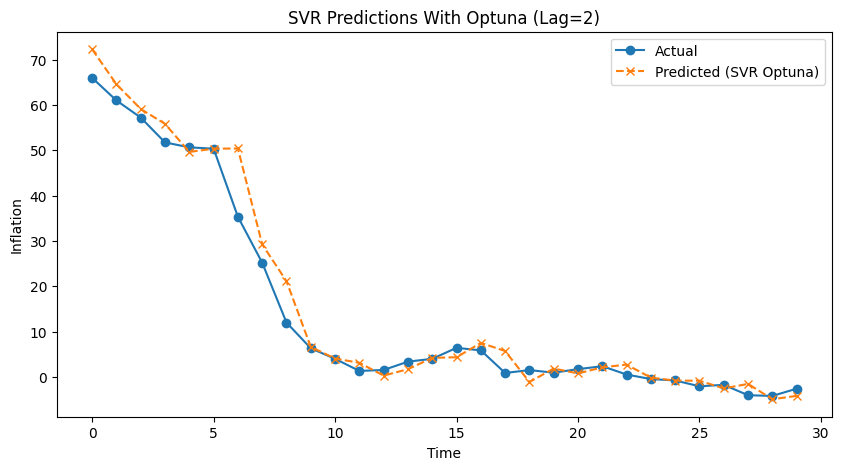

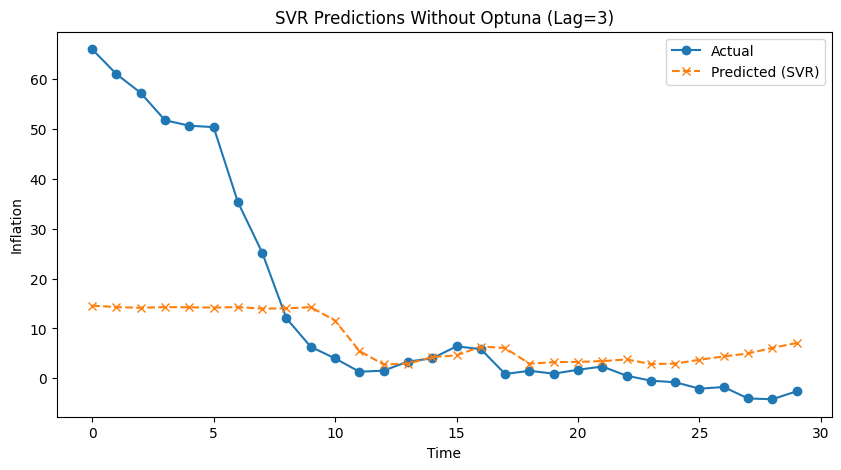

[I 2025-05-15 04:50:00,681] A new study created in memory with name: no-name-96e9e775-8a68-4458-aa9a-9c61e2203cc9
[I 2025-05-15 04:50:00,727] Trial 0 finished with value: 5.300579317639419 and parameters: {'C': 3.5745368370134467, 'epsilon': 0.6839768807725582, 'kernel': 'rbf'}. Best is trial 0 with value: 5.300579317639419.
[I 2025-05-15 04:50:01,267] Trial 1 finished with value: 22.440026868840246 and parameters: {'C': 2.8136700965565584, 'epsilon': 0.7775672309828078, 'kernel': 'poly'}. Best is trial 0 with value: 5.300579317639419.
[I 2025-05-15 04:50:02,924] Trial 2 finished with value: 23.763998610508146 and parameters: {'C': 9.94393399892835, 'epsilon': 0.7610035136288054, 'kernel': 'poly'}. Best is trial 0 with value: 5.300579317639419.
[I 2025-05-15 04:50:03,347] Trial 3 finished with value: 23.12315708779489 and parameters: {'C': 5.073459963829686, 'epsilon': 0.8558639025312682, 'kernel': 'poly'}. Best is trial 0 with value: 5.300579317639419.
[I 2025-05-15 04:50:03,387] Tria

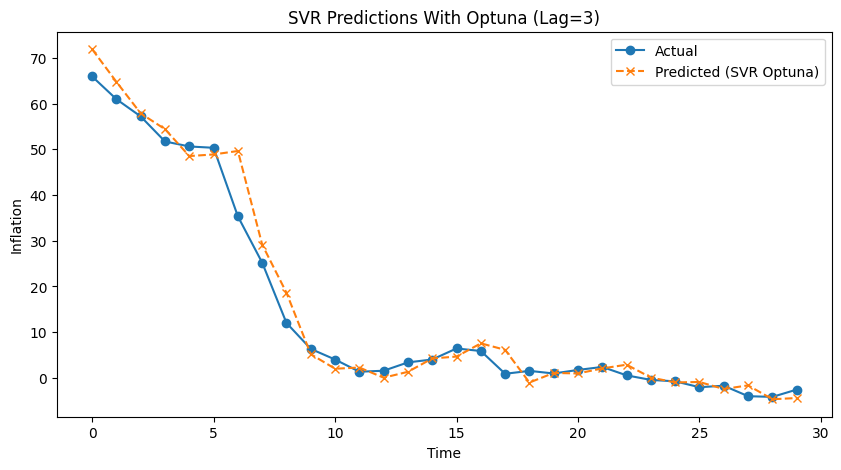

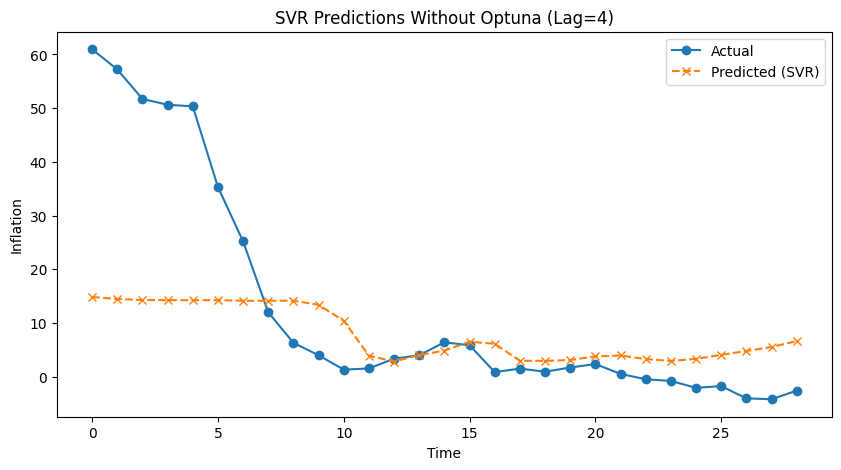

[I 2025-05-15 04:50:07,196] A new study created in memory with name: no-name-d56dfd0c-7c8e-4fdd-b669-33afcfa6db5a
[I 2025-05-15 04:50:07,238] Trial 0 finished with value: 74.49480714827573 and parameters: {'C': 8.065486926834739, 'epsilon': 0.6691704408987994, 'kernel': 'sigmoid'}. Best is trial 0 with value: 74.49480714827573.
[I 2025-05-15 04:50:07,270] Trial 1 finished with value: 6.884595672539 and parameters: {'C': 0.3637867795626125, 'epsilon': 0.14466397210639584, 'kernel': 'rbf'}. Best is trial 1 with value: 6.884595672539.
[I 2025-05-15 04:50:07,403] Trial 2 finished with value: 1.6647351180035712 and parameters: {'C': 2.0859719033710005, 'epsilon': 0.5777562532444129, 'kernel': 'linear'}. Best is trial 2 with value: 1.6647351180035712.
[I 2025-05-15 04:50:07,435] Trial 3 finished with value: 6.687623589065464 and parameters: {'C': 0.5198127280564732, 'epsilon': 0.3982862607267491, 'kernel': 'rbf'}. Best is trial 2 with value: 1.6647351180035712.
[I 2025-05-15 04:50:07,471] Tr

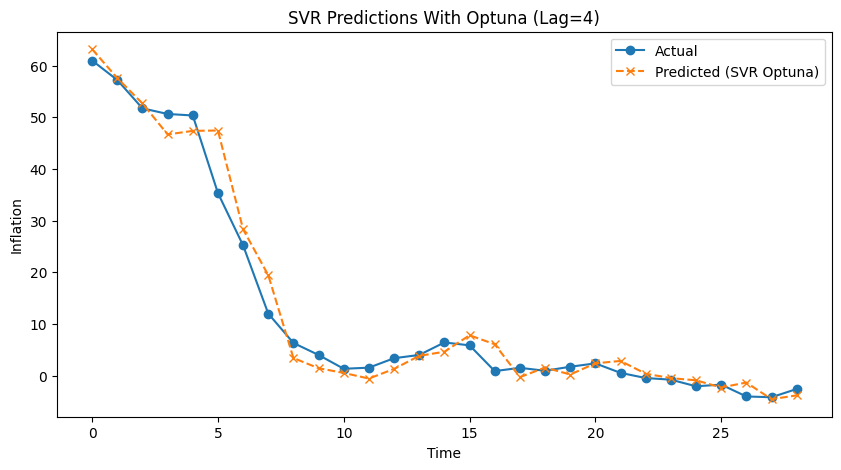

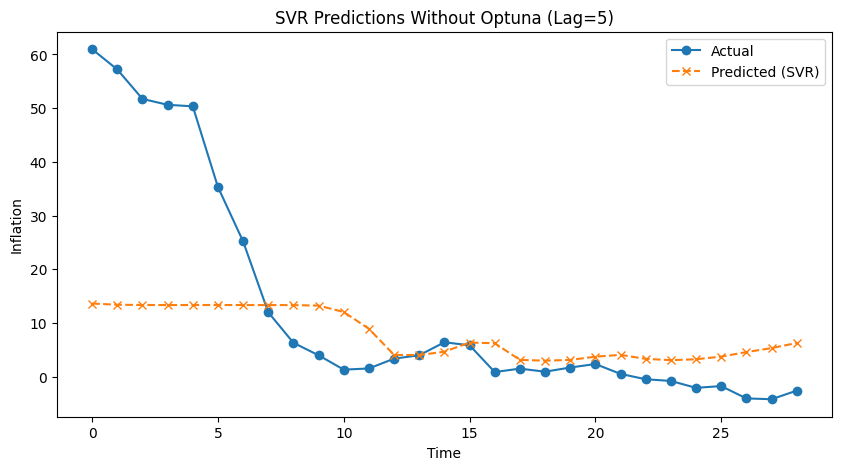

[I 2025-05-15 04:50:12,167] A new study created in memory with name: no-name-16385ab0-0a85-47e7-af46-cad121b096de
[I 2025-05-15 04:50:12,211] Trial 0 finished with value: 57.70958962594112 and parameters: {'C': 6.242315292262339, 'epsilon': 0.8159189190189257, 'kernel': 'sigmoid'}. Best is trial 0 with value: 57.70958962594112.
[I 2025-05-15 04:50:12,501] Trial 1 finished with value: 1.6007502046459146 and parameters: {'C': 4.9937128643452535, 'epsilon': 0.01467493694957649, 'kernel': 'linear'}. Best is trial 1 with value: 1.6007502046459146.
[I 2025-05-15 04:50:13,915] Trial 2 finished with value: 1.6905444772457248 and parameters: {'C': 9.368530534015408, 'epsilon': 0.6968380519686397, 'kernel': 'linear'}. Best is trial 1 with value: 1.6007502046459146.
[I 2025-05-15 04:50:15,958] Trial 3 finished with value: 27.796793132976546 and parameters: {'C': 9.117903768777566, 'epsilon': 0.9004835108527959, 'kernel': 'poly'}. Best is trial 1 with value: 1.6007502046459146.
[I 2025-05-15 04:50

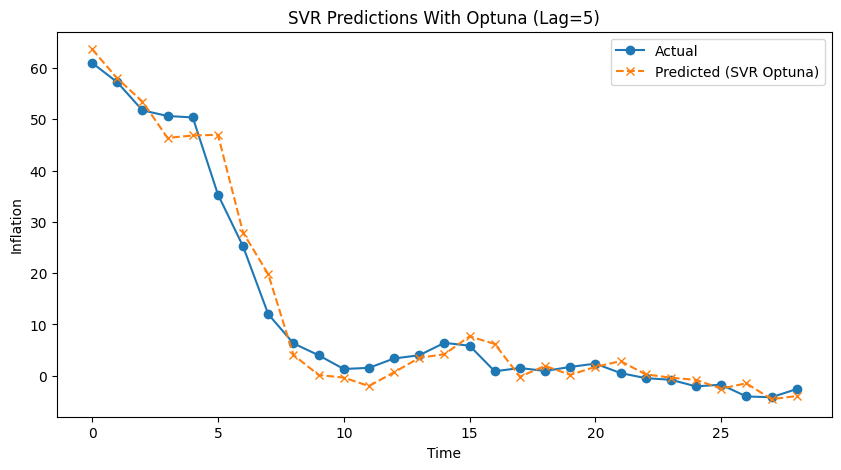

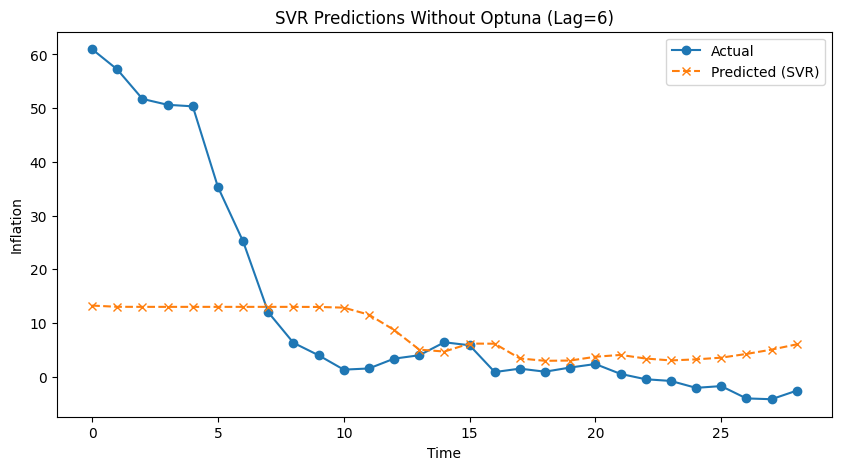

[I 2025-05-15 04:50:22,436] A new study created in memory with name: no-name-d72ae5c7-5881-4b93-9364-17b192d67e01
[I 2025-05-15 04:50:23,244] Trial 0 finished with value: 37.51330306515288 and parameters: {'C': 7.357896123971947, 'epsilon': 0.862447887600601, 'kernel': 'poly'}. Best is trial 0 with value: 37.51330306515288.
[I 2025-05-15 04:50:23,549] Trial 1 finished with value: 25.89128897553392 and parameters: {'C': 2.1139572779143956, 'epsilon': 0.5194962098741648, 'kernel': 'poly'}. Best is trial 1 with value: 25.89128897553392.
[I 2025-05-15 04:50:24,420] Trial 2 finished with value: 1.613411358820602 and parameters: {'C': 8.962542900332767, 'epsilon': 0.3367679176647475, 'kernel': 'linear'}. Best is trial 2 with value: 1.613411358820602.
[I 2025-05-15 04:50:24,463] Trial 3 finished with value: 72.10373377069139 and parameters: {'C': 8.181609410828178, 'epsilon': 0.7534386131106157, 'kernel': 'sigmoid'}. Best is trial 2 with value: 1.613411358820602.
[I 2025-05-15 04:50:25,230] T

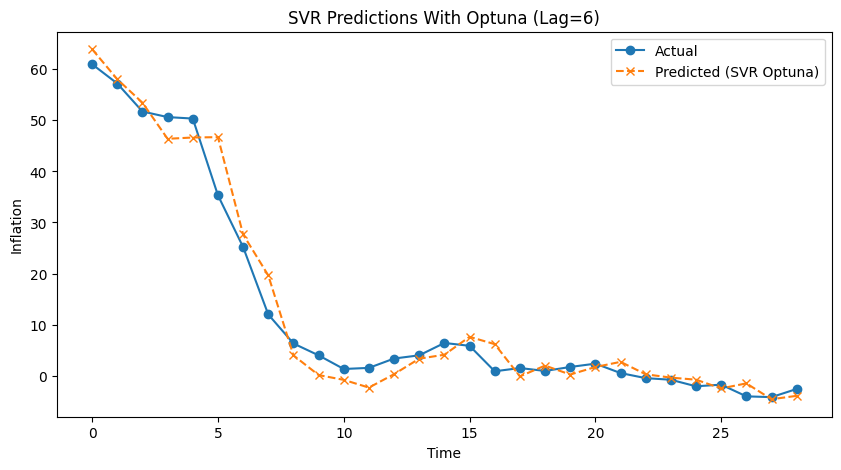

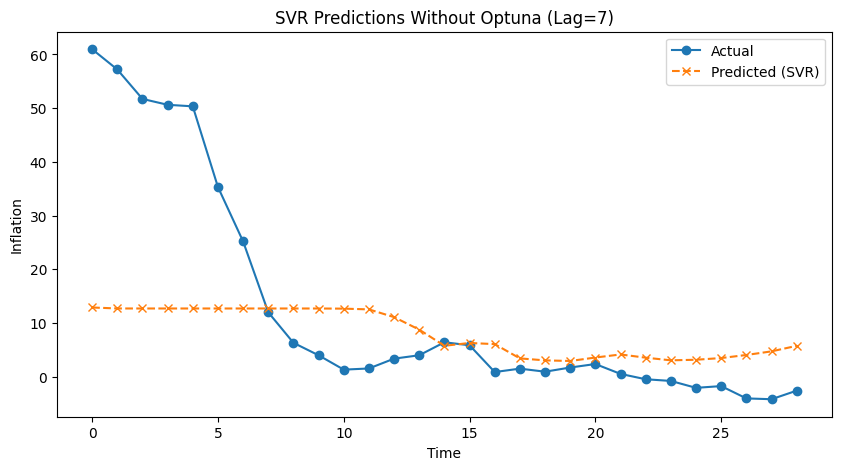

[I 2025-05-15 04:50:33,407] A new study created in memory with name: no-name-573a0d50-a20d-4a35-a6ff-bcd51257f91c
[I 2025-05-15 04:50:33,690] Trial 0 finished with value: 18.227276662593464 and parameters: {'C': 1.6892748217359819, 'epsilon': 0.37995851645157536, 'kernel': 'poly'}. Best is trial 0 with value: 18.227276662593464.
[I 2025-05-15 04:50:33,732] Trial 1 finished with value: 56.1064930196669 and parameters: {'C': 6.321599745509142, 'epsilon': 0.7043470245918199, 'kernel': 'sigmoid'}. Best is trial 0 with value: 18.227276662593464.
[I 2025-05-15 04:50:33,774] Trial 2 finished with value: 12.680031511829423 and parameters: {'C': 0.6403593023355763, 'epsilon': 0.9353093393698534, 'kernel': 'sigmoid'}. Best is trial 2 with value: 12.680031511829423.
[I 2025-05-15 04:50:33,995] Trial 3 finished with value: 16.11737090712817 and parameters: {'C': 1.6833439201691764, 'epsilon': 0.7685462052030758, 'kernel': 'poly'}. Best is trial 2 with value: 12.680031511829423.
[I 2025-05-15 04:50

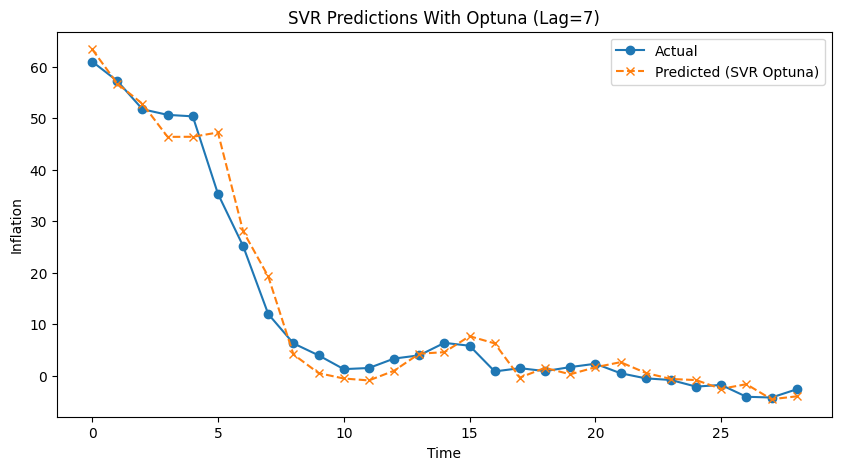

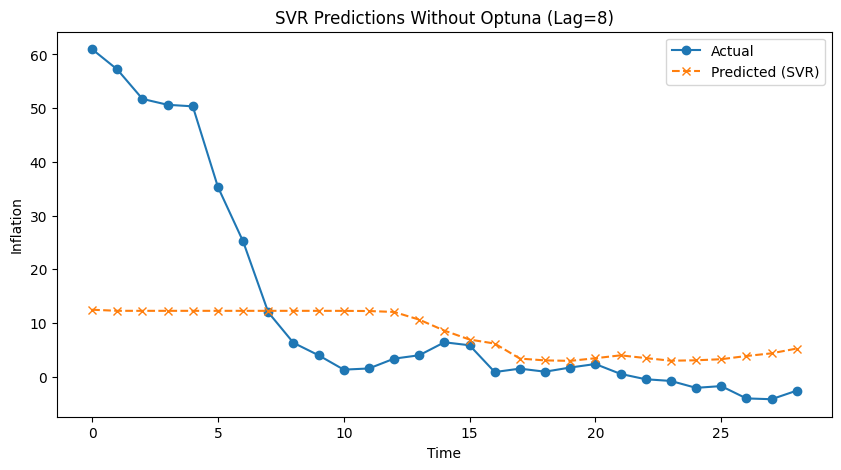

[I 2025-05-15 04:50:41,713] A new study created in memory with name: no-name-ae544dae-5cd0-42e1-a08a-4d561e7f73fb
[I 2025-05-15 04:50:41,762] Trial 0 finished with value: 6.6209755235995456 and parameters: {'C': 8.797604538747924, 'epsilon': 0.7840934448181169, 'kernel': 'rbf'}. Best is trial 0 with value: 6.6209755235995456.
[I 2025-05-15 04:50:41,830] Trial 1 finished with value: 8.675575263000164 and parameters: {'C': 0.34953887008890905, 'epsilon': 0.5597959619615187, 'kernel': 'poly'}. Best is trial 0 with value: 6.6209755235995456.
[I 2025-05-15 04:50:41,871] Trial 2 finished with value: 6.633000878436673 and parameters: {'C': 5.786196616493652, 'epsilon': 0.8701996175880146, 'kernel': 'rbf'}. Best is trial 0 with value: 6.6209755235995456.
[I 2025-05-15 04:50:41,914] Trial 3 finished with value: 6.744085730532914 and parameters: {'C': 2.3153960475244553, 'epsilon': 0.8125518017859251, 'kernel': 'rbf'}. Best is trial 0 with value: 6.6209755235995456.
[I 2025-05-15 04:50:41,953] T

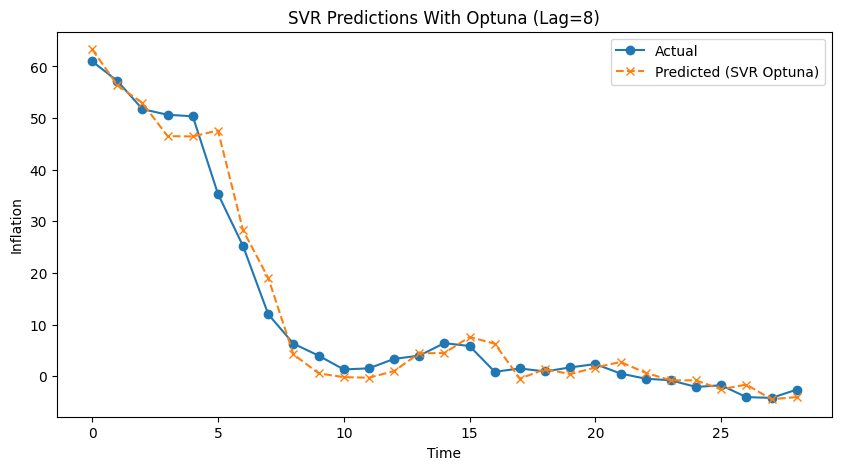

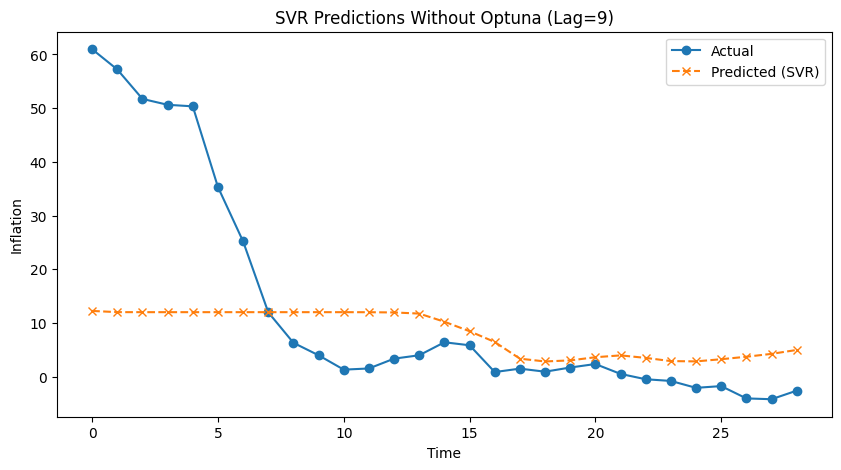

[I 2025-05-15 04:50:54,937] A new study created in memory with name: no-name-7fb93d38-764f-4ef7-b150-1052adabd0ec
[I 2025-05-15 04:50:55,536] Trial 0 finished with value: 1.5745108370369278 and parameters: {'C': 4.310842139107517, 'epsilon': 0.33995581267526553, 'kernel': 'linear'}. Best is trial 0 with value: 1.5745108370369278.
[I 2025-05-15 04:50:55,579] Trial 1 finished with value: 35.24607869326168 and parameters: {'C': 3.634476934635575, 'epsilon': 0.6437860718330141, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5745108370369278.
[I 2025-05-15 04:50:55,619] Trial 2 finished with value: 7.071293987610057 and parameters: {'C': 1.0893995855318281, 'epsilon': 0.11113156611557883, 'kernel': 'rbf'}. Best is trial 0 with value: 1.5745108370369278.
[I 2025-05-15 04:50:55,663] Trial 3 finished with value: 38.86123099476377 and parameters: {'C': 4.09140295553116, 'epsilon': 0.7156768538846033, 'kernel': 'sigmoid'}. Best is trial 0 with value: 1.5745108370369278.
[I 2025-05-15 04:50:

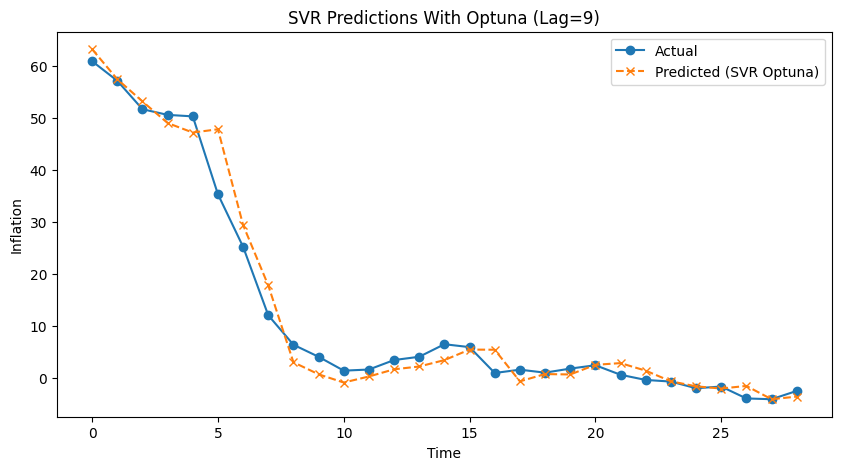

In [6]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Initialize results list
results = []

# Loop through lag terms from 1 to 9
for max_lag in range(1, 10):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets
    train_size = int(0.9 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train SVR model without Optuna
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2_baseline = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, None, None, None, r2_baseline])

    # Plot actual vs. predicted values for the baseline model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", marker='o')
    plt.plot(y_pred, label="Predicted (SVR)", linestyle='dashed', marker='x')
    plt.title(f'SVR Predictions Without Optuna (Lag={max_lag})')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        C = trial.suggest_float("C", 0.1, 10.0)
        epsilon = trial.suggest_float("epsilon", 0.01, 1.0)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])

        svr_model = SVR(C=C, epsilon=epsilon, kernel=kernel)

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            svr_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = svr_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train best model
    svr_best = SVR(**best_params)
    svr_best.fit(X_train, y_train)
    y_pred_optuna = svr_best.predict(X_test)

    # Evaluate Optuna model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([
        max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna,
        best_params['C'], best_params['epsilon'], best_params['kernel'], r2_optuna
    ])

    # Plot actual vs. predicted values for Optuna-optimized model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", marker='o')
    plt.plot(y_pred_optuna, label="Predicted (SVR Optuna)", linestyle='dashed', marker='x')
    plt.title(f'SVR Predictions With Optuna (Lag={max_lag})')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=[
    'Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE', 'Test MAE', 'Test MAPE',
    'Best C', 'Best Epsilon', 'Best Kernel', 'R²'
])
results_df.to_csv('svr_lag_results2.csv', index=False)


In [ ]:
# 9 with optuna {'C': 9.273202181050134, 'epsilon': 0.30349767581664033, 'kernel': 'linear'}.

# Optimal SVR

Downloading...
From: https://docs.google.com/spreadsheets/d/11kMXVOIzTz0EGXQDYJtX945igTfAjqwg/export?format=xlsx
To: /content/Inflation_Predictions_SARIMA.xlsx
16.9kB [00:00, 1.24MB/s]


   Year  Month  Day  Inflation
0  2000      1   31   0.329139
1  2000      2   28   1.940367
2  2000      3   31   4.469678
3  2000      4   30   3.672022
4  2000      5   31   2.382412
Index(['Year', 'Month', 'Day', 'Inflation'], dtype='object')
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
200

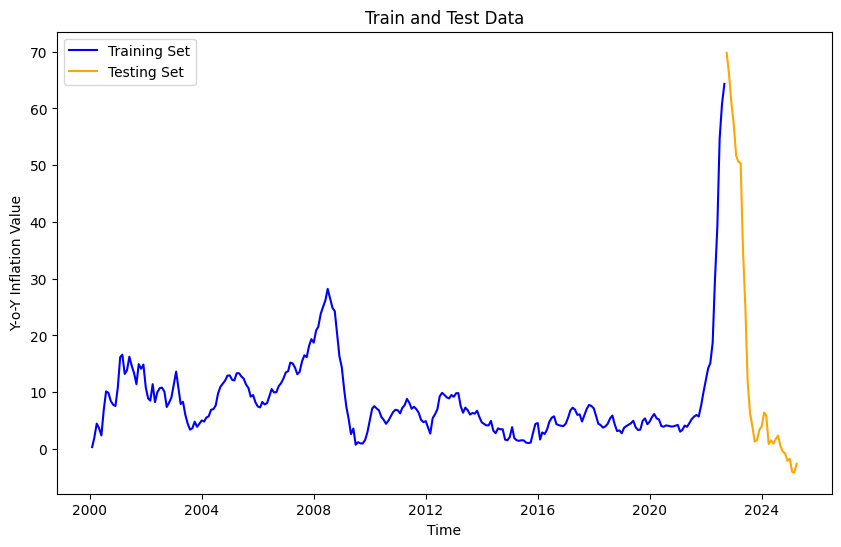

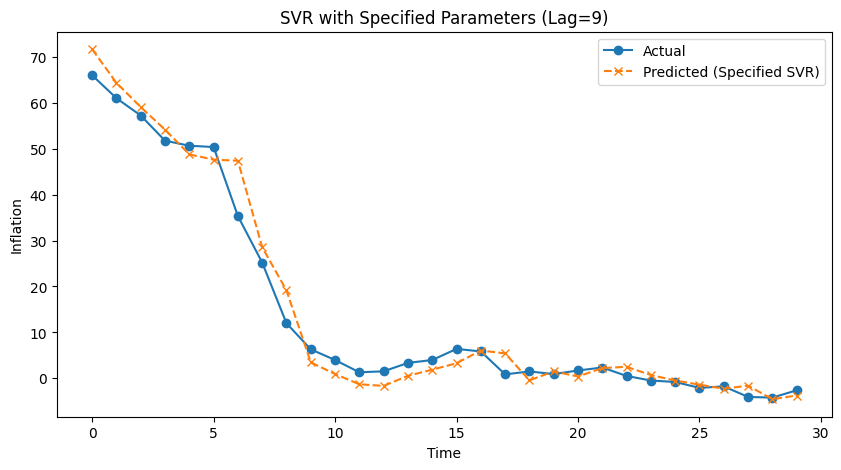

In [7]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")
# Standard libraries
import sys
import os
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# LOADING THE DATASET
import gdown
# Google Sheets URL (Updated)
google_sheets_url = "https://docs.google.com/spreadsheets/d/11kMXVOIzTz0EGXQDYJtX945igTfAjqwg/export?format=xlsx"

# Download file
output_file = 'Inflation_Predictions_SARIMA.xlsx'
gdown.download(google_sheets_url, output=output_file, quiet=False)

# Load data
data = pd.read_excel(output_file)

# Initial display
print(data.head())

# Copy and explore
df = data.copy()
print(df.columns)

# Display column names
df.columns


# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()

df.columns
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'df' contains the Inflation data in a column named 'Inflation'

# Refit SVR model using specific parameters and lag = 9
max_lag = 9
df_lagged = df.copy()

# Create lag features
for lag in range(1, max_lag + 1):
    df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

# Drop NaN values
df_lagged = df_lagged.dropna()

# Split into train and test sets
train_size = int(0.9 * len(df_lagged))
train, test = df_lagged[:train_size], df_lagged[train_size:]

y_train, y_test = train['Inflation'], test['Inflation']
X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

# Initialize SVR with specified parameters
svr_specific = SVR(C=9.273202181050134, epsilon=0.30349767581664033, kernel='linear')
svr_specific.fit(X_train, y_train)
y_pred_specific = svr_specific.predict(X_test)

# Evaluate model
mse_spec = mean_squared_error(y_test, y_pred_specific)
rmse_spec = np.sqrt(mse_spec)
mae_spec = mean_absolute_error(y_test, y_pred_specific)
mape_spec = np.mean(np.abs((y_test - y_pred_specific) / y_test)) * 100
r2_spec = r2_score(y_test, y_pred_specific)

# Add results
results.append([
    max_lag, 'Specified Params', rmse_spec, mse_spec, mae_spec, mape_spec,
    9.273202181050134, 0.30349767581664033, 'linear', r2_spec
])

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_specific, label="Predicted (Specified SVR)", linestyle='--', marker='x')
plt.title(f'SVR with Specified Parameters (Lag={max_lag})')
plt.xlabel("Time")
plt.ylabel("Inflation")
plt.legend()
plt.show()


In [8]:
# Print test errors for the specified SVR model
print(f"Test RMSE:  {rmse_spec:.4f}")
print(f"Test MSE:   {mse_spec:.4f}")
print(f"Test MAE:   {mae_spec:.4f}")
print(f"Test MAPE:  {mape_spec:.2f}%")
print(f"Test R²:    {r2_spec:.4f}")


Test RMSE:  3.4995
Test MSE:   12.2466
Test MAE:   2.5836
Test MAPE:  83.31%
Test R²:    0.9756


## Get Prediction for the whole data set

Downloading...
From: https://docs.google.com/spreadsheets/d/11kMXVOIzTz0EGXQDYJtX945igTfAjqwg/export?format=xlsx
To: /content/Inflation_Predictions_SARIMA.xlsx
16.9kB [00:00, 27.0MB/s]


   Year  Month  Day  Inflation
0  2000      1   31   0.329139
1  2000      2   28   1.940367
2  2000      3   31   4.469678
3  2000      4   30   3.672022
4  2000      5   31   2.382412
Index(['Year', 'Month', 'Day', 'Inflation'], dtype='object')
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
200

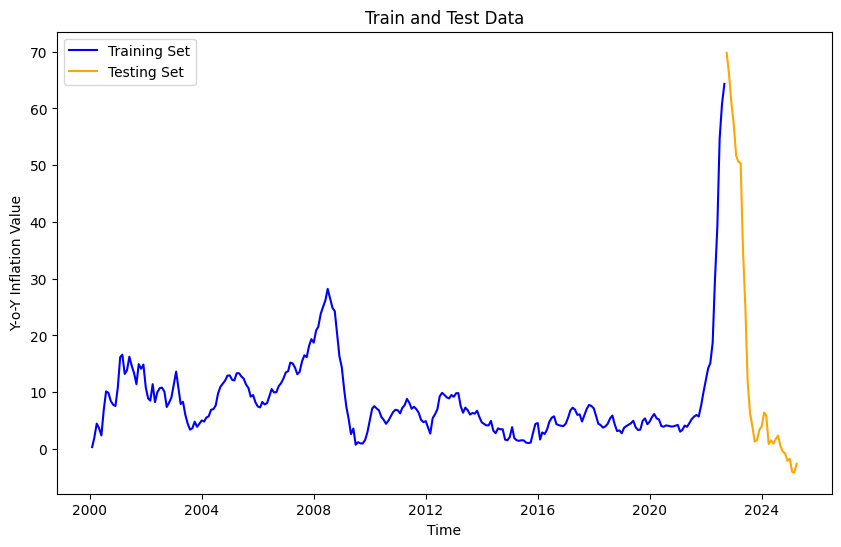

            Inflation  SVR_Prediction
Date                                 
2000-10-31   7.794494        7.786219
2000-11-30   7.559566        7.864713
2000-12-31  10.836729        7.248605
2001-01-31  16.170425       11.308153
2001-02-28  16.618124       18.530548


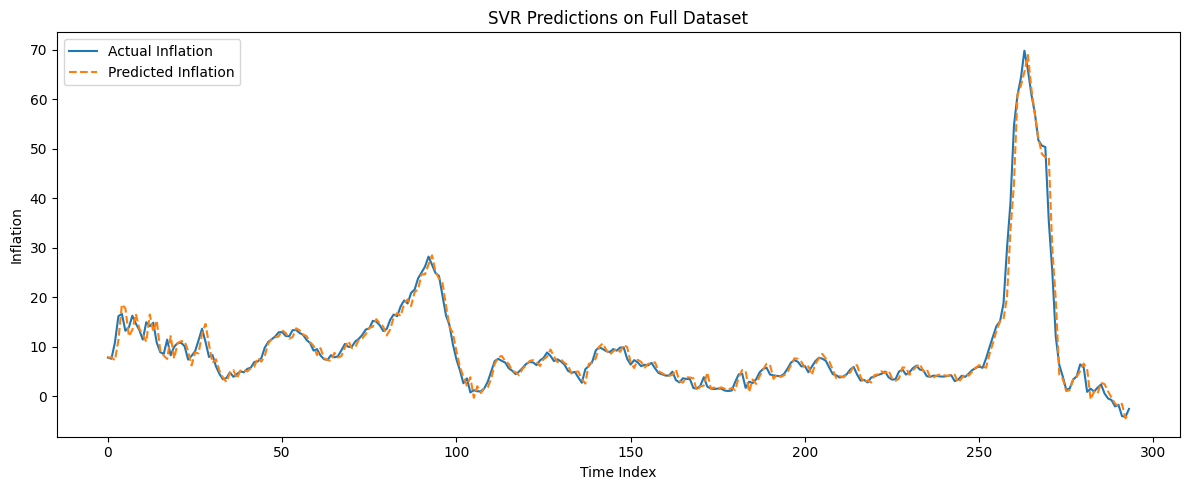

In [9]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")
# Standard libraries
import sys
import os
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# LOADING THE DATASET
import gdown
# Google Sheets URL (Updated)
google_sheets_url = "https://docs.google.com/spreadsheets/d/11kMXVOIzTz0EGXQDYJtX945igTfAjqwg/export?format=xlsx"

# Download file
output_file = 'Inflation_Predictions_SARIMA.xlsx'
gdown.download(google_sheets_url, output=output_file, quiet=False)

# Load data
data = pd.read_excel(output_file)

# Initial display
print(data.head())

# Copy and explore
df = data.copy()
print(df.columns)

# Display column names
df.columns


# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()

df.columns
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Set lag value
max_lag = 9

# Create lag features on full dataset
df_full = df.copy()
for lag in range(1, max_lag + 1):
    df_full[f'Inflation_Lag_{lag}'] = df_full['Inflation'].shift(lag)

# Drop rows with NaNs due to lagging
df_full = df_full.dropna()

# Define predictors and response
X_full = df_full[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
y_full = df_full['Inflation']

# Fit SVR model with specified parameters on full data
svr_full_model = SVR(C=9.273202181050134, epsilon=0.30349767581664033, kernel='linear')
svr_full_model.fit(X_full, y_full)

# Predict on full data
y_full_pred = svr_full_model.predict(X_full)

# Add predictions to DataFrame
df_full['SVR_Prediction'] = y_full_pred

# Optionally display or save the result
print(df_full[['Inflation', 'SVR_Prediction']].head())

# If you want to visualize
plt.figure(figsize=(12, 5))
plt.plot(df_full['Inflation'].values, label='Actual Inflation')
plt.plot(df_full['SVR_Prediction'].values, label='Predicted Inflation', linestyle='--')
plt.title("SVR Predictions on Full Dataset")
plt.xlabel("Time Index")
plt.ylabel("Inflation")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
df_full

,Inflation,Inflation_Lag_1,Inflation_Lag_2,Inflation_Lag_3,Inflation_Lag_4,Inflation_Lag_5,Inflation_Lag_6,Inflation_Lag_7,Inflation_Lag_8,Inflation_Lag_9,SVR_Prediction
Date,,,,,,,,,,,
2000-10-31,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,1.940367,0.329139,7.786219
2000-11-30,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,1.940367,7.864713
2000-12-31,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,7.248605
2001-01-31,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,11.308153
2001-02-28,16.618124,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,18.530548
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,5.857520,-1.504964
2024-12-31,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,-2.050241
2025-01-31,-4.035874,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,-1.555624


In [11]:
# Calculate residuals and add to DataFrame
df_full['Residuals_SVR'] = df_full['Inflation'] - df_full['SVR_Prediction']

# Optionally display the relevant columns
print(df_full[['Inflation', 'SVR_Prediction', 'Residuals_SVR']].head())


            Inflation  SVR_Prediction  Residuals_SVR
Date                                                
2000-10-31   7.794494        7.786219       0.008275
2000-11-30   7.559566        7.864713      -0.305147
2000-12-31  10.836729        7.248605       3.588124
2001-01-31  16.170425       11.308153       4.862272
2001-02-28  16.618124       18.530548      -1.912424


In [13]:
# Ensure 'Date' is set as index
#df_full = df_full.set_index('Date')

# Select and save relevant columns
df_full[['Inflation', 'SVR_Prediction', 'Residuals_SVR']].to_csv('svr_full_predictions_with_residuals.csv')

# Confirm success
print("File saved as svr_full_predictions_with_residuals.csv")


File saved as svr_full_predictions_with_residuals.csv


CSV saved as svr_full_predictions_with_residuals.csv with DateTime index.


In [15]:
df_full

,Inflation,Inflation_Lag_1,Inflation_Lag_2,Inflation_Lag_3,Inflation_Lag_4,Inflation_Lag_5,Inflation_Lag_6,Inflation_Lag_7,Inflation_Lag_8,Inflation_Lag_9,SVR_Prediction,Residuals_SVR
Date,,,,,,,,,,,,
2000-10-31,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,1.940367,0.329139,7.786219,0.008275
2000-11-30,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,1.940367,7.864713,-0.305147
2000-12-31,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,7.248605,3.588124
2001-01-31,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,11.308153,4.862272
2001-02-28,16.618124,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,18.530548,-1.912424
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,5.857520,-1.504964,-0.563288
2024-12-31,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,-2.050241,0.307545
2025-01-31,-4.035874,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,-1.555624,-2.480250


In [19]:
residual_df=df_full[["Residuals_SVR"]]

In [20]:
residual_df

,Residuals_SVR
Date,
2000-10-31,0.008275
2000-11-30,-0.305147
2000-12-31,3.588124
2001-01-31,4.862272
2001-02-28,-1.912424
...,...
2024-11-30,-0.563288
2024-12-31,0.307545
2025-01-31,-2.480250


In [21]:
df=residual_df.copy()
df

,Residuals_SVR
Date,
2000-10-31,0.008275
2000-11-30,-0.305147
2000-12-31,3.588124
2001-01-31,4.862272
2001-02-28,-1.912424
...,...
2024-11-30,-0.563288
2024-12-31,0.307545
2025-01-31,-2.480250


# CNN 1

# *

            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
DatetimeIndex(['2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=294, freq=None)


[I 2025-05-15 07:28:29,290] A new study created in memory with name: no-name-64c7bdab-b612-4206-b765-11b269665a56
[I 2025-05-15 07:28:44,461] Trial 0 finished with value: 0.0040411928202956915 and parameters: {'filters': 114, 'kernel_size': 1, 'lr': 0.0031816033525751317, 'epochs': 49, 'batch_size': 32}. Best is trial 0 with value: 0.0040411928202956915.
[I 2025-05-15 07:28:52,904] Trial 1 finished with value: 0.0040630298511435585 and parameters: {'filters': 108, 'kernel_size': 1, 'lr': 0.0004315264375085629, 'epochs': 11, 'batch_size': 8}. Best is trial 0 with value: 0.0040411928202956915.
[I 2025-05-15 07:29:10,909] Trial 2 finished with value: 0.017077472371359665 and parameters: {'filters': 59, 'kernel_size': 1, 'lr': 0.0001421402308306391, 'epochs': 33, 'batch_size': 8}. Best is trial 0 with value: 0.0040411928202956915.
[I 2025-05-15 07:29:23,937] Trial 3 finished with value: 0.049291202798485756 and parameters: {'filters': 56, 'kernel_size': 1, 'lr': 0.00029207546473598384, 'ep

Best trial: {'filters': 65, 'kernel_size': 1, 'lr': 0.0036905697528497043, 'epochs': 44, 'batch_size': 32}
Epoch 1/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2548  
Epoch 2/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0333 
Epoch 3/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 
Epoch 4/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 
Epoch 5/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050  
Epoch 6/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 
Epoch 7/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049  
Epoch 8/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045  
Epoch 9/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052  
Epoch 10/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 
Epoch 11/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 
Epoch 12/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 
Epoch 13/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 
Epoch 14/44
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

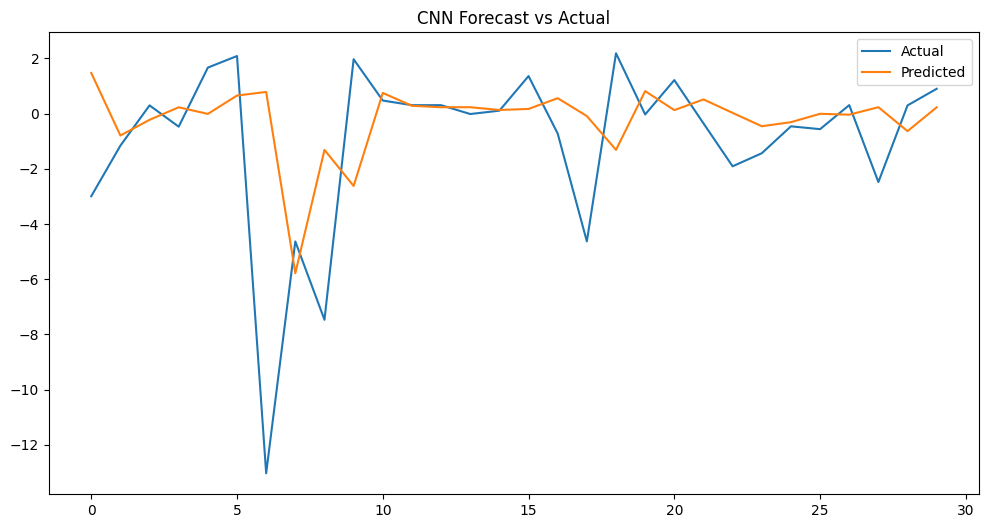

In [41]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# LOADING THE DATASET
import gdown

df=residual_df.copy()

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
! pip install optuna
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Residuals_SVR" # e.g., "Residuals_SVR"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 1  # Monthly data (1 year of past data to predict next month)  #################################################################

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)

split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model(trial, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 1, 1), #################################################################
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
                  loss='mse')
    return model

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=3)
    val_losses = []

    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]

        model = create_model(trial, input_shape=X_train.shape[1:])
        model.fit(X_t, y_t, epochs=trial.suggest_int('epochs', 10, 50), verbose=0, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]))

        val_loss = model.evaluate(X_v, y_v, verbose=0)
        val_losses.append(val_loss)

    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best trial:', study.best_trial.params)

# Train final model
best_params = study.best_trial.params
model = Sequential()
model.add(Conv1D(filters=best_params['filters'],
                 kernel_size=best_params['kernel_size'],
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_params['lr']),
              loss='mse')

model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()




In [42]:
# Step 1: Create input for full data
X_full, _ = create_sequences(df[target_column].values, window_size)
X_full = X_full[..., np.newaxis]  # Reshape for CNN

# Step 2: Predict on full data
y_pred_full_scaled = model.predict(X_full)

# Step 3: Inverse transform to get residuals in original scale
y_pred_full = scaler.inverse_transform(y_pred_full_scaled)

# Step 4: Align predictions with original DataFrame
# Create a Series with appropriate index offset by `window_size`
predicted_index = df.index[window_size:]
df.loc[predicted_index, 'CNN_Residuals_Pred'] = y_pred_full.flatten()

# Step 5: Display result
print(df[['Residuals_SVR', 'CNN_Residuals_Pred']].dropna().head())


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
            Residuals_SVR  CNN_Residuals_Pred
Date                                         
2000-11-30       0.513898            0.138801
2000-12-31       0.671066            0.041337
2001-01-31       0.722502            1.252016
2001-02-28       0.449013            1.648236
2001-03-31       0.342410           -0.458475


In [43]:
df

,Residuals_SVR,CNN_Residuals_Pred
Date,,
2000-10-31,0.526550,NaN
2000-11-30,0.513898,0.138801
2000-12-31,0.671066,0.041337
2001-01-31,0.722502,1.252016
2001-02-28,0.449013,1.648236
...,...,...
2024-11-30,0.503477,-0.007165
2024-12-31,0.538632,-0.038937
2025-01-31,0.426091,0.231865


In [44]:
df_full

,Inflation,Inflation_Lag_1,Inflation_Lag_2,Inflation_Lag_3,Inflation_Lag_4,Inflation_Lag_5,Inflation_Lag_6,Inflation_Lag_7,Inflation_Lag_8,Inflation_Lag_9,SVR_Prediction,Residuals_SVR
Date,,,,,,,,,,,,
2000-10-31,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,1.940367,0.329139,7.786219,0.008275
2000-11-30,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,1.940367,7.864713,-0.305147
2000-12-31,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,7.248605,3.588124
2001-01-31,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,11.308153,4.862272
2001-02-28,16.618124,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,18.530548,-1.912424
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,5.857520,-1.504964,-0.563288
2024-12-31,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,-2.050241,0.307545
2025-01-31,-4.035874,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,-1.555624,-2.480250


In [51]:
# Merge the two dataframes on their DateTime index
df_merged = pd.merge(df, df_full, left_index=True, right_index=True, how='inner')

# Display first few rows
print(df_merged.head())
df_merged

            Residuals_SVR_x  CNN_Residuals_Pred  Inflation  Inflation_Lag_1  \
Date                                                                          
2000-10-31         0.526550                 NaN   7.794494         8.455851   
2000-11-30         0.513898            0.138801   7.559566         7.794494   
2000-12-31         0.671066            0.041337  10.836729         7.559566   
2001-01-31         0.722502            1.252016  16.170425        10.836729   
2001-02-28         0.449013            1.648236  16.618124        16.170425   

            Inflation_Lag_2  Inflation_Lag_3  Inflation_Lag_4  \
Date                                                            
2000-10-31         9.876072        10.139831         6.799835   
2000-11-30         8.455851         9.876072        10.139831   
2000-12-31         7.794494         8.455851         9.876072   
2001-01-31         7.559566         7.794494         8.455851   
2001-02-28        10.836729         7.559566         7.7

,Residuals_SVR_x,CNN_Residuals_Pred,Inflation,Inflation_Lag_1,Inflation_Lag_2,Inflation_Lag_3,Inflation_Lag_4,Inflation_Lag_5,Inflation_Lag_6,Inflation_Lag_7,Inflation_Lag_8,Inflation_Lag_9,SVR_Prediction,Residuals_SVR_y
Date,,,,,,,,,,,,,,
2000-10-31,0.526550,NaN,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,1.940367,0.329139,7.786219,0.008275
2000-11-30,0.513898,0.138801,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,1.940367,7.864713,-0.305147
2000-12-31,0.671066,0.041337,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,7.248605,3.588124
2001-01-31,0.722502,1.252016,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,11.308153,4.862272
2001-02-28,0.449013,1.648236,16.618124,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,18.530548,-1.912424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,0.503477,-0.007165,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,5.857520,-1.504964,-0.563288
2024-12-31,0.538632,-0.038937,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,-2.050241,0.307545
2025-01-31,0.426091,0.231865,-4.035874,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,-1.555624,-2.480250


In [52]:
df_merged = df_merged.iloc[1:]
df_merged.columns
df_merged

,Residuals_SVR_x,CNN_Residuals_Pred,Inflation,Inflation_Lag_1,Inflation_Lag_2,Inflation_Lag_3,Inflation_Lag_4,Inflation_Lag_5,Inflation_Lag_6,Inflation_Lag_7,Inflation_Lag_8,Inflation_Lag_9,SVR_Prediction,Residuals_SVR_y
Date,,,,,,,,,,,,,,
2000-11-30,0.513898,0.138801,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,1.940367,7.864713,-0.305147
2000-12-31,0.671066,0.041337,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,4.469678,7.248605,3.588124
2001-01-31,0.722502,1.252016,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,3.672022,11.308153,4.862272
2001-02-28,0.449013,1.648236,16.618124,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,2.382412,18.530548,-1.912424
2001-03-31,0.342410,-0.458475,13.213922,16.618124,16.170425,10.836729,7.559566,7.794494,8.455851,9.876072,10.139831,6.799835,17.767066,-4.553144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,0.503477,-0.007165,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,5.857520,-1.504964,-0.563288
2024-12-31,0.538632,-0.038937,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,0.871795,-2.050241,0.307545
2025-01-31,0.426091,0.231865,-4.035874,-1.742696,-2.068252,-0.783699,-0.469239,0.526039,2.365931,1.716069,0.936037,1.508060,-1.555624,-2.480250


In [54]:
df_merged['SVR_CNN'] = df_merged['CNN_Residuals_Pred'] + df_merged['SVR_Prediction']
df_merged = df_merged[['Inflation', 'SVR_CNN']]


In [57]:
df_merged.columns

Index(['Inflation', 'SVR_CNN'], dtype='object')

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split into train and test
split_index = int(len(df_merged) * 0.9)
df_test = df_merged.iloc[split_index:]

# Extract actual and predicted values
y_true = df_test['Inflation'].values
y_pred = df_test['SVR_CNN'].values

# Evaluation metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

# Print the metrics
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")


 Test MSE  : 10.9877
 Test RMSE : 3.3148
 Test MAE  : 1.9046
 Test MAPE : 64.90%
 Test R²   : 0.9781


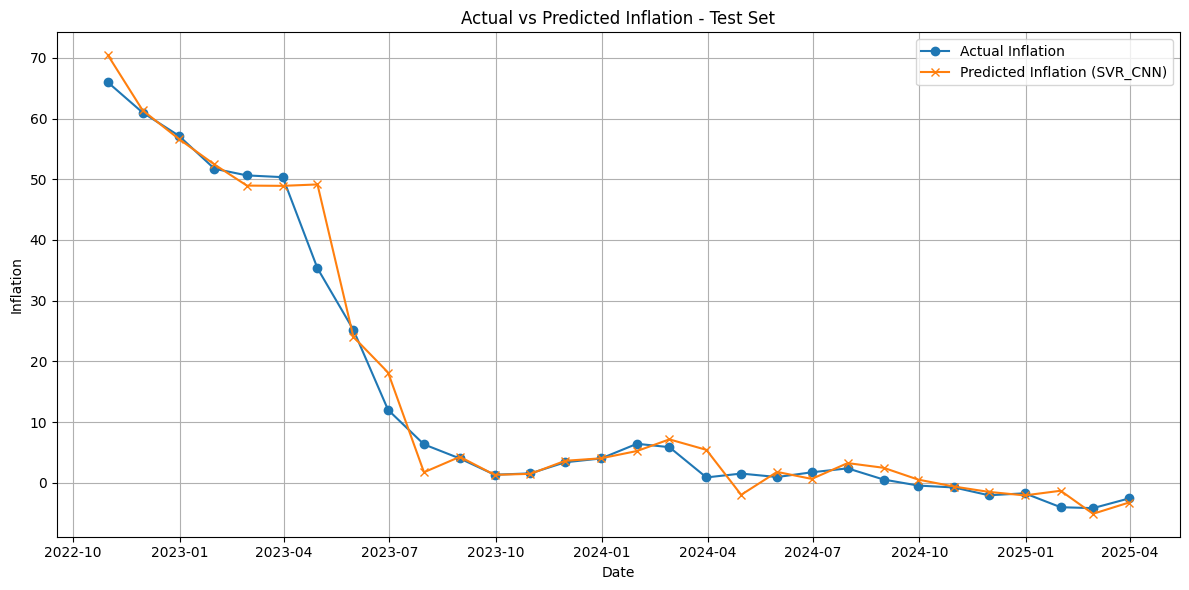

In [59]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted on the test set
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, y_true, label='Actual Inflation', marker='o')
plt.plot(df_test.index, y_pred, label='Predicted Inflation (SVR_CNN)', marker='x')
plt.title('Actual vs Predicted Inflation - Test Set')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2

In [25]:
df=residual_df.copy()
df

,Residuals_SVR
Date,
2000-10-31,0.008275
2000-11-30,-0.305147
2000-12-31,3.588124
2001-01-31,4.862272
2001-02-28,-1.912424
...,...
2024-11-30,-0.563288
2024-12-31,0.307545
2025-01-31,-2.480250


In [ ]:
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


In [26]:
df.columns

Index(['Residuals_SVR'], dtype='object')

In [27]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Residuals_SVR" # e.g., "Inflation"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 2  # Monthly data (1 year of past data to predict next month)

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)


In [28]:
split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


In [29]:
import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model(trial, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 1, 2),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
                  loss='mse')
    return model

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=3)
    val_losses = []

    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]

        model = create_model(trial, input_shape=X_train.shape[1:])
        model.fit(X_t, y_t, epochs=trial.suggest_int('epochs', 10, 50), verbose=0, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]))

        val_loss = model.evaluate(X_v, y_v, verbose=0)
        val_losses.append(val_loss)

    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best trial:', study.best_trial.params)


[I 2025-05-15 05:21:06,996] A new study created in memory with name: no-name-bb228f1f-88d9-4e06-bba4-2107fe39bf6e
[I 2025-05-15 05:21:21,081] Trial 0 finished with value: 0.0038576837784300246 and parameters: {'filters': 85, 'kernel_size': 1, 'lr': 0.001922696996850615, 'epochs': 37, 'batch_size': 32}. Best is trial 0 with value: 0.0038576837784300246.
[I 2025-05-15 05:21:37,143] Trial 1 finished with value: 0.0036005120103557906 and parameters: {'filters': 124, 'kernel_size': 1, 'lr': 0.0004297855111285827, 'epochs': 36, 'batch_size': 8}. Best is trial 1 with value: 0.0036005120103557906.
[I 2025-05-15 05:21:51,712] Trial 2 finished with value: 0.004689114944388469 and parameters: {'filters': 113, 'kernel_size': 1, 'lr': 0.005387818842763041, 'epochs': 45, 'batch_size': 16}. Best is trial 1 with value: 0.0036005120103557906.
[I 2025-05-15 05:22:04,438] Trial 3 finished with value: 0.003589737151438991 and parameters: {'filters': 81, 'kernel_size': 2, 'lr': 0.0008952923993155331, 'epoc

Best trial: {'filters': 73, 'kernel_size': 2, 'lr': 0.0008297394495533341, 'epochs': 32, 'batch_size': 16}


In [30]:
# Train final model
best_params = study.best_trial.params
model = Sequential()
model.add(Conv1D(filters=best_params['filters'],
                 kernel_size=best_params['kernel_size'],
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_params['lr']),
              loss='mse')

model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)


Epoch 1/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3480
Epoch 2/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1699 
Epoch 3/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0660 
Epoch 4/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 
Epoch 5/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 
Epoch 6/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 
Epoch 7/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 
Epoch 8/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 
Epoch 9/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 
Epoch 10/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 
Epoch 11/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 
Epoch 12/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 
Epoch 13/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 
Epoch 14/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 
Epoch 15/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 
Epoch

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2: {r2:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Test MSE: 10.4672
Test MAE: 1.9547
Test R2: -0.1017


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
 Test MSE  : 10.4672
 Test RMSE : 3.2353
 Test MAE  : 1.9547
 Test MAPE : 271.42%
 Test R²   : -0.1017


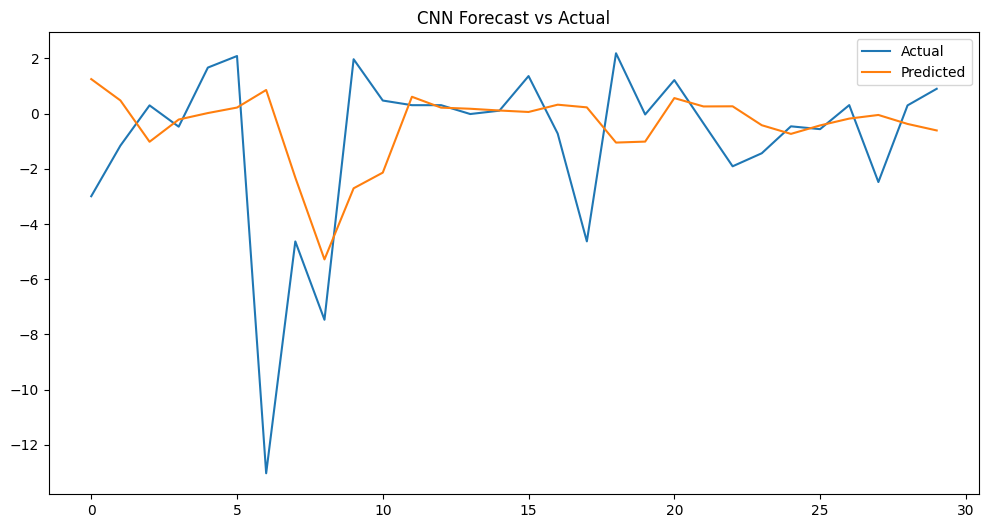

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()


## 3

            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
DatetimeIndex(['2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=294, freq=None)


[I 2025-05-15 05:41:21,867] A new study created in memory with name: no-name-8c8c9c6e-743b-4a92-9d73-b8d9bf6ce173
[I 2025-05-15 05:41:37,162] Trial 0 finished with value: 0.01741243836780389 and parameters: {'filters': 82, 'kernel_size': 2, 'lr': 0.0001241679259748991, 'epochs': 47, 'batch_size': 32}. Best is trial 0 with value: 0.01741243836780389.
[I 2025-05-15 05:41:50,414] Trial 1 finished with value: 0.005966553697362542 and parameters: {'filters': 73, 'kernel_size': 2, 'lr': 0.00013934243032282719, 'epochs': 24, 'batch_size': 8}. Best is trial 1 with value: 0.005966553697362542.
[I 2025-05-15 05:42:03,058] Trial 2 finished with value: 0.0037050426471978426 and parameters: {'filters': 79, 'kernel_size': 2, 'lr': 0.0010795647717320594, 'epochs': 44, 'batch_size': 32}. Best is trial 2 with value: 0.0037050426471978426.
[I 2025-05-15 05:42:22,107] Trial 3 finished with value: 0.003825587686151266 and parameters: {'filters': 64, 'kernel_size': 3, 'lr': 0.001826778318645411, 'epochs': 

Best trial: {'filters': 98, 'kernel_size': 2, 'lr': 0.0017232841065517525, 'epochs': 21, 'batch_size': 16}
Epoch 1/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1763   
Epoch 2/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 
Epoch 3/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 
Epoch 4/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 
Epoch 5/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 
Epoch 6/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 
Epoch 7/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035
Epoch 8/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038
Epoch 9/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043
Epoch 10/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046
Epoch 11/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 12/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043
Epoch 13/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042
Epoch 14/21
17/17 ━━━━━━━━━━━━━━━━━━

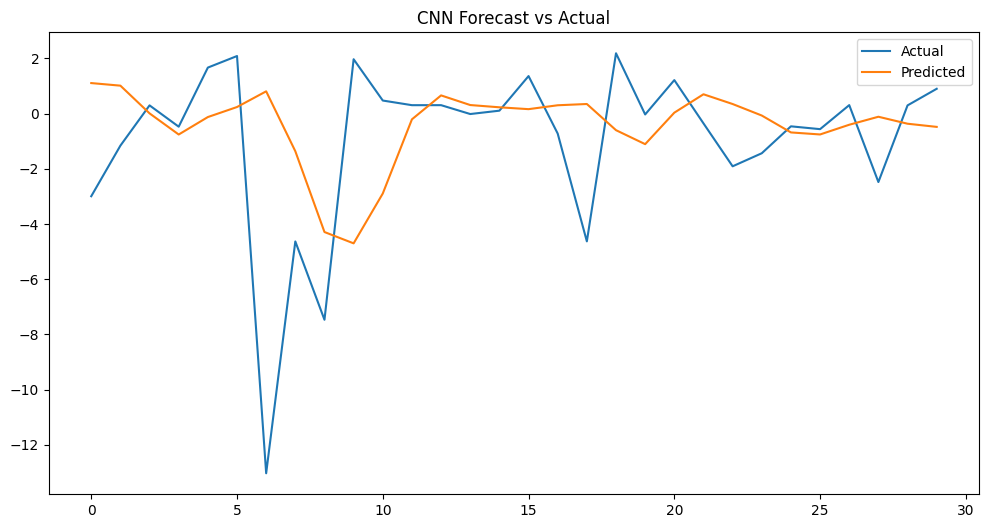

In [34]:
df=residual_df.copy()
df
# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
! pip install optuna
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Residuals_SVR"  # e.g., "Inflation"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 3  # Monthly data (1 year of past data to predict next month)  #################################################################

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)

split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model(trial, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 1, 3), #################################################################
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
                  loss='mse')
    return model

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=3)
    val_losses = []

    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]

        model = create_model(trial, input_shape=X_train.shape[1:])
        model.fit(X_t, y_t, epochs=trial.suggest_int('epochs', 10, 50), verbose=0, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]))

        val_loss = model.evaluate(X_v, y_v, verbose=0)
        val_losses.append(val_loss)

    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best trial:', study.best_trial.params)

# Train final model
best_params = study.best_trial.params
model = Sequential()
model.add(Conv1D(filters=best_params['filters'],
                 kernel_size=best_params['kernel_size'],
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_params['lr']),
              loss='mse')

model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()




## 4

[I 2025-05-15 05:47:20,986] A new study created in memory with name: no-name-ddf95f81-113d-41db-b109-b825ba49fb34
[I 2025-05-15 05:47:33,408] Trial 0 finished with value: 0.00392005320948859 and parameters: {'filters': 43, 'kernel_size': 3, 'lr': 0.0003040615236996733, 'epochs': 24, 'batch_size': 8}. Best is trial 0 with value: 0.00392005320948859.
[I 2025-05-15 05:47:42,704] Trial 1 finished with value: 0.003880222405617436 and parameters: {'filters': 54, 'kernel_size': 2, 'lr': 0.0006528617921958973, 'epochs': 24, 'batch_size': 32}. Best is trial 1 with value: 0.003880222405617436.
[I 2025-05-15 05:47:48,840] Trial 2 finished with value: 0.00408968764046828 and parameters: {'filters': 106, 'kernel_size': 3, 'lr': 0.001274644316372247, 'epochs': 10, 'batch_size': 16}. Best is trial 1 with value: 0.003880222405617436.
[I 2025-05-15 05:48:00,564] Trial 3 finished with value: 0.003658188274130225 and parameters: {'filters': 76, 'kernel_size': 1, 'lr': 0.0003788299368802626, 'epochs': 26,

Best trial: {'filters': 76, 'kernel_size': 1, 'lr': 0.0003788299368802626, 'epochs': 26, 'batch_size': 8}
Epoch 1/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2044
Epoch 2/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0548
Epoch 3/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112
Epoch 4/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055
Epoch 5/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064
Epoch 6/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040
Epoch 7/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049
Epoch 8/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043
Epoch 9/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061
Epoch 10/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050
Epoch 11/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037
Epoch 12/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042
Epoch 13/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046
Epoch 14/26
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

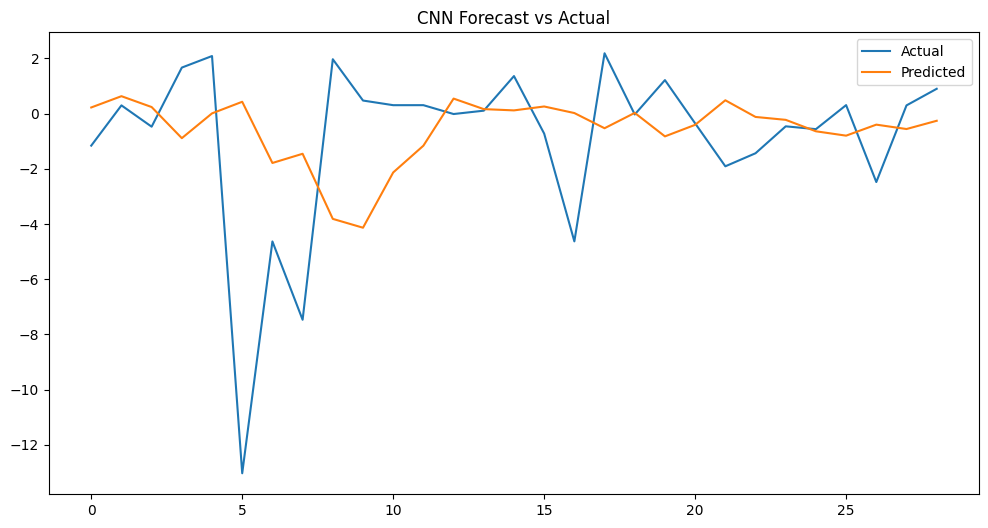

In [35]:
df=residual_df.copy()
df
! pip install optuna
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Residuals_SVR"  # e.g., "Inflation"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 4  # Monthly data (1 year of past data to predict next month)  #################################################################

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)

split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model(trial, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 1, 4), #################################################################
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
                  loss='mse')
    return model

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=3)
    val_losses = []

    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]

        model = create_model(trial, input_shape=X_train.shape[1:])
        model.fit(X_t, y_t, epochs=trial.suggest_int('epochs', 10, 50), verbose=0, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]))

        val_loss = model.evaluate(X_v, y_v, verbose=0)
        val_losses.append(val_loss)

    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best trial:', study.best_trial.params)

# Train final model
best_params = study.best_trial.params
model = Sequential()
model.add(Conv1D(filters=best_params['filters'],
                 kernel_size=best_params['kernel_size'],
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_params['lr']),
              loss='mse')

model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()




## 5

            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
DatetimeIndex(['2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=294, freq=None)


[I 2025-05-15 05:54:37,169] A new study created in memory with name: no-name-b8448e78-b1ce-44f8-b58e-7a653d084f84
[I 2025-05-15 05:54:49,299] Trial 0 finished with value: 0.004505400701115529 and parameters: {'filters': 98, 'kernel_size': 1, 'lr': 0.008100164463644897, 'epochs': 32, 'batch_size': 16}. Best is trial 0 with value: 0.004505400701115529.
[I 2025-05-15 05:54:56,303] Trial 1 finished with value: 0.004118148858348529 and parameters: {'filters': 124, 'kernel_size': 2, 'lr': 0.00027439574049246734, 'epochs': 15, 'batch_size': 16}. Best is trial 1 with value: 0.004118148858348529.
[I 2025-05-15 05:55:16,377] Trial 2 finished with value: 0.004329040568942825 and parameters: {'filters': 109, 'kernel_size': 1, 'lr': 0.0015294862249134735, 'epochs': 44, 'batch_size': 16}. Best is trial 1 with value: 0.004118148858348529.
[I 2025-05-15 05:55:33,467] Trial 3 finished with value: 0.004161847367261847 and parameters: {'filters': 35, 'kernel_size': 5, 'lr': 0.0010464693640734662, 'epochs

Best trial: {'filters': 103, 'kernel_size': 1, 'lr': 0.000455873679521173, 'epochs': 30, 'batch_size': 32}
Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2390
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1567 
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0866 
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0464 
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0191 
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 
Epoch 13/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 
Epoch 14/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
 Test MSE  : 11.6007
 Test RMSE : 3.4060
 Test MAE  : 2.2154
 Test MAPE : 248.04%
 Test R²   : -0.1983


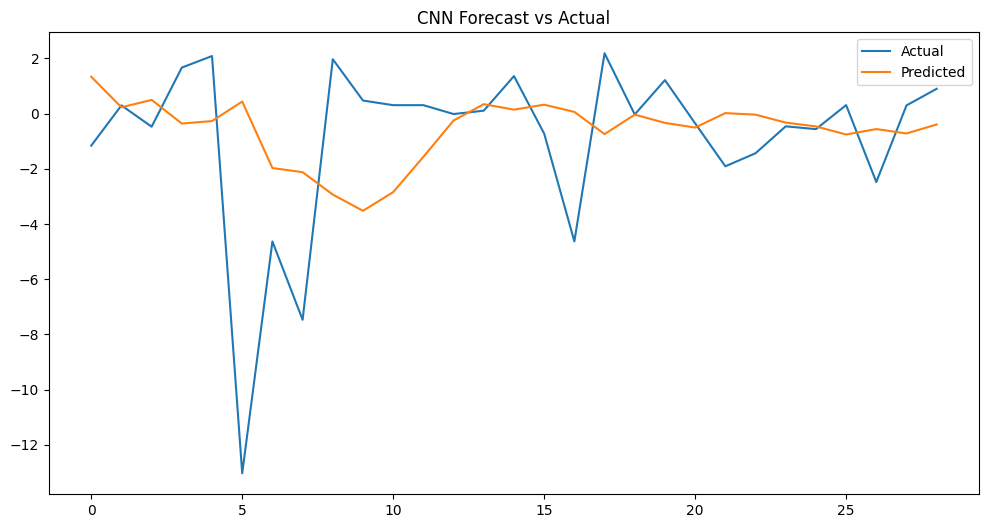

In [36]:
df=residual_df.copy()
df
# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
! pip install optuna
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Residuals_SVR"  # e.g., "Inflation"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 5  # Monthly data (1 year of past data to predict next month)  #################################################################

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)

split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model(trial, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 1, 5), #################################################################
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
                  loss='mse')
    return model

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=3)
    val_losses = []

    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]

        model = create_model(trial, input_shape=X_train.shape[1:])
        model.fit(X_t, y_t, epochs=trial.suggest_int('epochs', 10, 50), verbose=0, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]))

        val_loss = model.evaluate(X_v, y_v, verbose=0)
        val_losses.append(val_loss)

    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best trial:', study.best_trial.params)

# Train final model
best_params = study.best_trial.params
model = Sequential()
model.add(Conv1D(filters=best_params['filters'],
                 kernel_size=best_params['kernel_size'],
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_params['lr']),
              loss='mse')

model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()




## 6

            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
DatetimeIndex(['2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=294, freq=None)


[I 2025-05-15 06:00:17,380] A new study created in memory with name: no-name-68eb6745-5ff4-4813-b357-85f5b3470cea
[I 2025-05-15 06:00:29,320] Trial 0 finished with value: 0.004341016368319591 and parameters: {'filters': 108, 'kernel_size': 5, 'lr': 0.0007222668531018575, 'epochs': 26, 'batch_size': 16}. Best is trial 0 with value: 0.004341016368319591.
[I 2025-05-15 06:00:45,885] Trial 1 finished with value: 0.004076997982338071 and parameters: {'filters': 64, 'kernel_size': 2, 'lr': 0.00025821179193723546, 'epochs': 45, 'batch_size': 16}. Best is trial 1 with value: 0.004076997982338071.
[I 2025-05-15 06:00:53,819] Trial 2 finished with value: 0.01202760978291432 and parameters: {'filters': 86, 'kernel_size': 2, 'lr': 0.00017087897686802813, 'epochs': 10, 'batch_size': 8}. Best is trial 1 with value: 0.004076997982338071.
[I 2025-05-15 06:01:03,816] Trial 3 finished with value: 0.004166268355523546 and parameters: {'filters': 83, 'kernel_size': 2, 'lr': 0.000419514651379066, 'epochs':

Best trial: {'filters': 60, 'kernel_size': 1, 'lr': 0.0004462557753172852, 'epochs': 18, 'batch_size': 16}
Epoch 1/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3102   
Epoch 2/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1767 
Epoch 3/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0808 
Epoch 4/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0296 
Epoch 5/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 
Epoch 6/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 
Epoch 7/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 
Epoch 8/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 
Epoch 9/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 
Epoch 10/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 
Epoch 11/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 
Epoch 12/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 
Epoch 13/18
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 
Epoch 14/18
17/17 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
 Test MSE  : 10.9528
 Test RMSE : 3.3095
 Test MAE  : 2.1142
 Test MAPE : 425.29%
 Test R²   : -0.1313


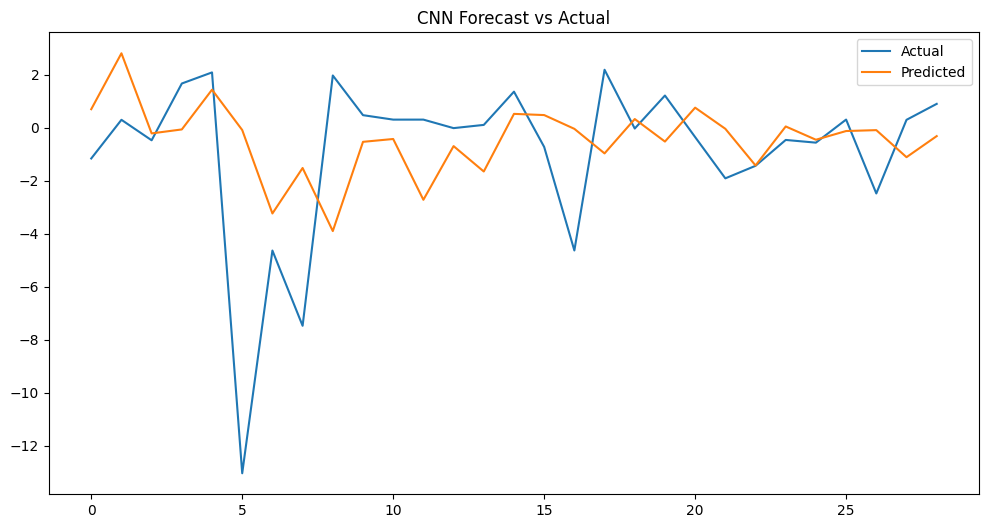

In [37]:
df=residual_df.copy()
df
# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
! pip install optuna
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Residuals_SVR"  # e.g., "Inflation"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 6  # Monthly data (1 year of past data to predict next month)  #################################################################

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)

split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model(trial, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 1, 6), #################################################################
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
                  loss='mse')
    return model

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=3)
    val_losses = []

    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]

        model = create_model(trial, input_shape=X_train.shape[1:])
        model.fit(X_t, y_t, epochs=trial.suggest_int('epochs', 10, 50), verbose=0, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]))

        val_loss = model.evaluate(X_v, y_v, verbose=0)
        val_losses.append(val_loss)

    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best trial:', study.best_trial.params)

# Train final model
best_params = study.best_trial.params
model = Sequential()
model.add(Conv1D(filters=best_params['filters'],
                 kernel_size=best_params['kernel_size'],
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_params['lr']),
              loss='mse')

model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()




## 7

            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
DatetimeIndex(['2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=294, freq=None)


[I 2025-05-15 06:06:12,514] A new study created in memory with name: no-name-ae4492cb-03c0-4b76-8bfd-4caee42d0a3e
[I 2025-05-15 06:06:23,714] Trial 0 finished with value: 0.004583980267246564 and parameters: {'filters': 102, 'kernel_size': 4, 'lr': 0.0016586215246869452, 'epochs': 25, 'batch_size': 16}. Best is trial 0 with value: 0.004583980267246564.
[I 2025-05-15 06:06:32,476] Trial 1 finished with value: 0.0039431739908953505 and parameters: {'filters': 94, 'kernel_size': 7, 'lr': 0.0005493170383839647, 'epochs': 23, 'batch_size': 32}. Best is trial 1 with value: 0.0039431739908953505.
[I 2025-05-15 06:06:46,524] Trial 2 finished with value: 0.0039014470918724933 and parameters: {'filters': 128, 'kernel_size': 1, 'lr': 0.0008981841754119351, 'epochs': 39, 'batch_size': 16}. Best is trial 2 with value: 0.0039014470918724933.
[I 2025-05-15 06:06:59,008] Trial 3 finished with value: 0.005177196968967716 and parameters: {'filters': 104, 'kernel_size': 6, 'lr': 0.006824415388912852, 'ep

Best trial: {'filters': 109, 'kernel_size': 7, 'lr': 0.00033272155035682344, 'epochs': 28, 'batch_size': 32}
Epoch 1/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1699  
Epoch 2/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1069 
Epoch 3/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 
Epoch 4/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 
Epoch 5/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 
Epoch 6/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 
Epoch 7/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 
Epoch 8/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 
Epoch 9/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 
Epoch 10/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 
Epoch 11/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 
Epoch 12/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 
Epoch 13/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 
Epoch 14/28
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

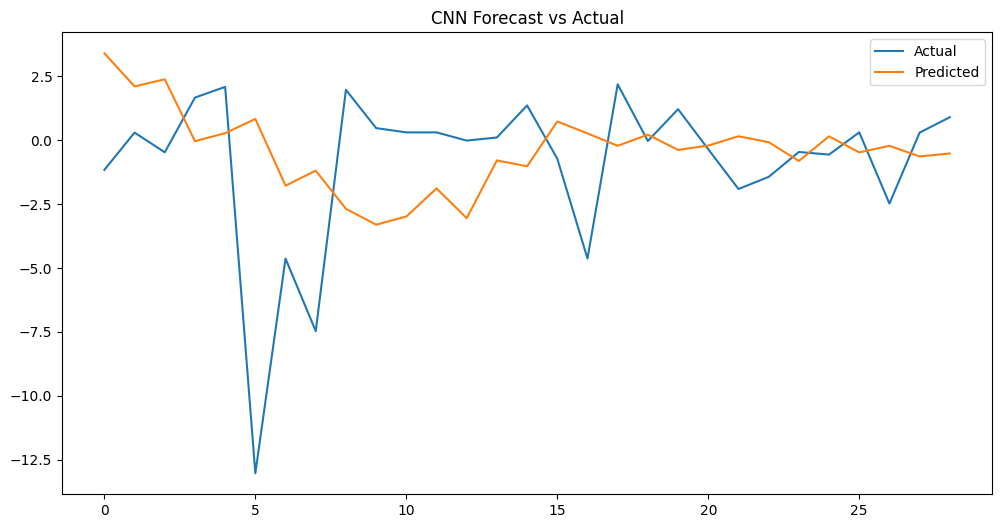

In [38]:
df=residual_df.copy()
df
# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
! pip install optuna
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Residuals_SVR"  # e.g., "Inflation"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 7  # Monthly data (1 year of past data to predict next month)  #################################################################

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)

split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model(trial, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 1, 7), #################################################################
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
                  loss='mse')
    return model

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=3)
    val_losses = []

    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]

        model = create_model(trial, input_shape=X_train.shape[1:])
        model.fit(X_t, y_t, epochs=trial.suggest_int('epochs', 10, 50), verbose=0, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]))

        val_loss = model.evaluate(X_v, y_v, verbose=0)
        val_losses.append(val_loss)

    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best trial:', study.best_trial.params)

# Train final model
best_params = study.best_trial.params
model = Sequential()
model.add(Conv1D(filters=best_params['filters'],
                 kernel_size=best_params['kernel_size'],
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_params['lr']),
              loss='mse')

model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()




## 8

            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
DatetimeIndex(['2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=294, freq=None)


[I 2025-05-15 06:12:54,463] A new study created in memory with name: no-name-84e6dfd4-679a-4cce-b998-30bda65897a7
[I 2025-05-15 06:13:07,085] Trial 0 finished with value: 0.004261435087149342 and parameters: {'filters': 47, 'kernel_size': 2, 'lr': 0.0009189802688661354, 'epochs': 24, 'batch_size': 8}. Best is trial 0 with value: 0.004261435087149342.
[I 2025-05-15 06:13:20,455] Trial 1 finished with value: 0.004143223166465759 and parameters: {'filters': 43, 'kernel_size': 3, 'lr': 0.0023774679864805057, 'epochs': 28, 'batch_size': 8}. Best is trial 1 with value: 0.004143223166465759.
[I 2025-05-15 06:13:28,969] Trial 2 finished with value: 0.004166019149124622 and parameters: {'filters': 92, 'kernel_size': 8, 'lr': 0.004839545890431422, 'epochs': 13, 'batch_size': 8}. Best is trial 1 with value: 0.004143223166465759.
[I 2025-05-15 06:13:38,477] Trial 3 finished with value: 0.005002982526396711 and parameters: {'filters': 125, 'kernel_size': 1, 'lr': 0.001941672383615289, 'epochs': 16,

Best trial: {'filters': 33, 'kernel_size': 6, 'lr': 0.00022466101289039152, 'epochs': 50, 'batch_size': 16}
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1579
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1000 
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0534 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0272 
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036     
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 
Epoch 14/50
17/17 ━━━━━━━━━

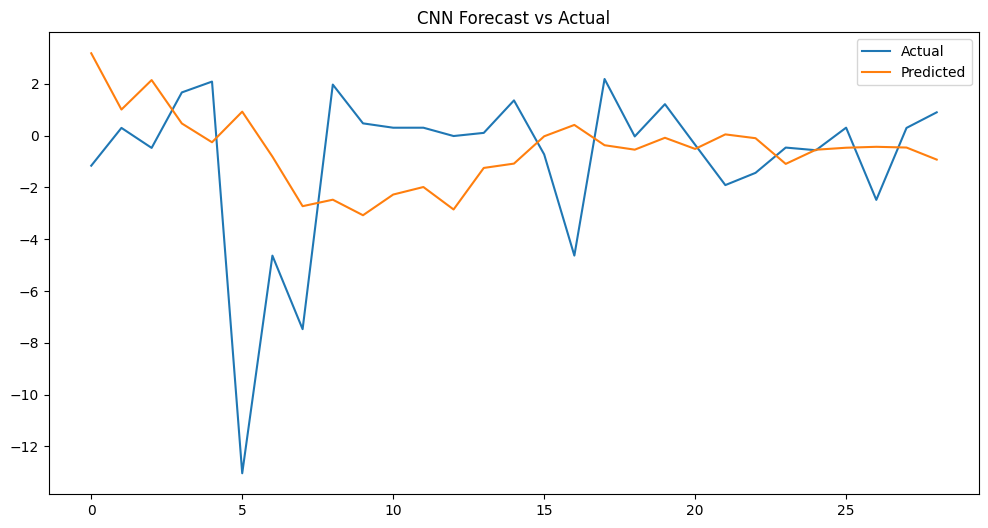

In [39]:
df=residual_df.copy()
df
# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
! pip install optuna
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Residuals_SVR"  # e.g., "Inflation"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 8  # Monthly data (1 year of past data to predict next month)  #################################################################

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)

split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model(trial, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 1, 8), #################################################################
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
                  loss='mse')
    return model

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=3)
    val_losses = []

    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]

        model = create_model(trial, input_shape=X_train.shape[1:])
        model.fit(X_t, y_t, epochs=trial.suggest_int('epochs', 10, 50), verbose=0, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]))

        val_loss = model.evaluate(X_v, y_v, verbose=0)
        val_losses.append(val_loss)

    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best trial:', study.best_trial.params)

# Train final model
best_params = study.best_trial.params
model = Sequential()
model.add(Conv1D(filters=best_params['filters'],
                 kernel_size=best_params['kernel_size'],
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_params['lr']),
              loss='mse')

model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()




## 9

            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
DatetimeIndex(['2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=294, freq=None)


[I 2025-05-15 06:20:30,243] A new study created in memory with name: no-name-9b4a29d1-4e15-4985-8dce-83a2abaab3ad
[I 2025-05-15 06:20:48,720] Trial 0 finished with value: 0.004198744582633178 and parameters: {'filters': 95, 'kernel_size': 4, 'lr': 0.00033656060423833376, 'epochs': 50, 'batch_size': 16}. Best is trial 0 with value: 0.004198744582633178.
[I 2025-05-15 06:20:58,944] Trial 1 finished with value: 0.0039707375690341 and parameters: {'filters': 127, 'kernel_size': 9, 'lr': 0.0013440824536757174, 'epochs': 32, 'batch_size': 32}. Best is trial 1 with value: 0.0039707375690341.
[I 2025-05-15 06:21:05,348] Trial 2 finished with value: 0.004483599526186784 and parameters: {'filters': 112, 'kernel_size': 9, 'lr': 0.0005862980130355796, 'epochs': 10, 'batch_size': 32}. Best is trial 1 with value: 0.0039707375690341.
[I 2025-05-15 06:21:12,131] Trial 3 finished with value: 0.004052705907573302 and parameters: {'filters': 71, 'kernel_size': 9, 'lr': 0.0009083314768659012, 'epochs': 12

Best trial: {'filters': 61, 'kernel_size': 9, 'lr': 0.00019786563644514063, 'epochs': 30, 'batch_size': 8}
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2423
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1014
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0267
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

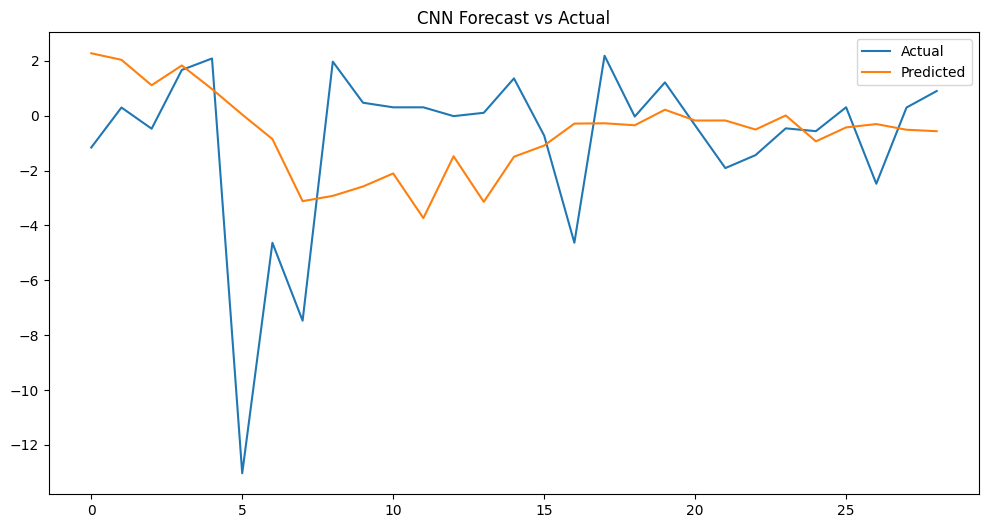

In [40]:
df=residual_df.copy()
df
# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
! pip install optuna
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Residuals_SVR"  # e.g., "Inflation"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 9  # Monthly data (1 year of past data to predict next month)  #################################################################

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)

split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model(trial, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 1, 9), #################################################################
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
                  loss='mse')
    return model

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=3)
    val_losses = []

    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]

        model = create_model(trial, input_shape=X_train.shape[1:])
        model.fit(X_t, y_t, epochs=trial.suggest_int('epochs', 10, 50), verbose=0, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]))

        val_loss = model.evaluate(X_v, y_v, verbose=0)
        val_losses.append(val_loss)

    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best trial:', study.best_trial.params)

# Train final model
best_params = study.best_trial.params
model = Sequential()
model.add(Conv1D(filters=best_params['filters'],
                 kernel_size=best_params['kernel_size'],
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_params['lr']),
              loss='mse')

model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse:.4f}")
print(f" Test RMSE : {rmse:.4f}")
print(f" Test MAE  : {mae:.4f}")
print(f" Test MAPE : {mape:.2f}%")
print(f" Test R²   : {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()


